1.3.2 Arithmetic Operations on Images

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [28]:
x = np.uint8([250])
y = np.uint8([10])
print (cv2.add(x,y)) # 250+10 = 260 => 255
print (x+y) # 250+10 = 260 % 256 = 4

[[255]]
[4]


In [29]:
cv2.add(x,y)

array([[255]], dtype=uint8)

In [30]:
img1 = cv2.imread('musk1.jpg') #이미지 크기가 같아야 함 
img2 = cv2.imread('doge1.jpg')

In [31]:
w=0.5
dst = cv2.addWeighted(img1,w,img2,1-w,0)

In [32]:
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
w=1
dst = cv2.addWeighted(img1,w,img2,w-0.5,0)
cv2.imshow('image',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
def nothing(x):
    pass

In [35]:
cv2.namedWindow('image')
cv2.createTrackbar('weight','image',0,255,nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    weight = cv2.getTrackbarPos('weight','image')
    dst= cv2.addWeighted(img1,weight/255,img2,1-weight/255,0)
    cv2.imshow('image',dst)

cv2.destroyAllWindows()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\highgui\src\window_w32.cpp:2577: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


In [36]:
# Load two images 
img1 = cv2.imread('Thailand.jpg')
img2 = cv2.imread('cv.png')

In [37]:
def pltImage(img):
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [38]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
print(rows,cols,channels)

580 822 3


In [39]:
roi = img1[0:rows, 0:cols ]

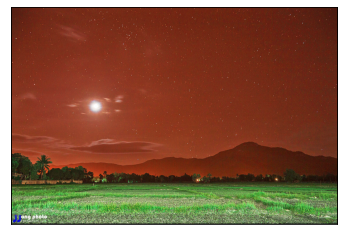

In [40]:
pltImage(img1)

In [41]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

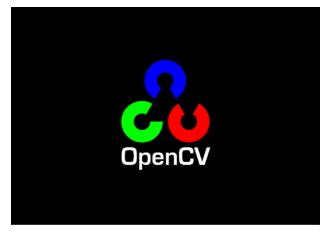

In [42]:
pltImage(img2)

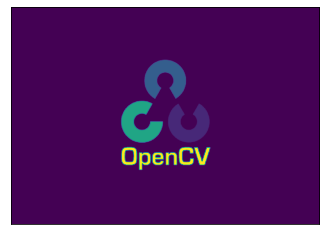

In [43]:
pltImage(img2gray)

In [17]:
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)

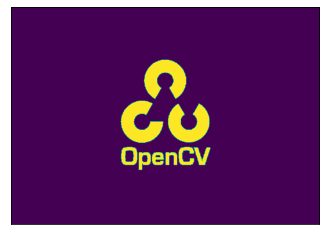

In [44]:
pltImage(mask)

In [17]:
mask_inv = cv2.bitwise_not(mask)

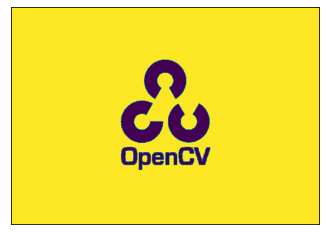

In [45]:
pltImage(mask_inv)

In [17]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

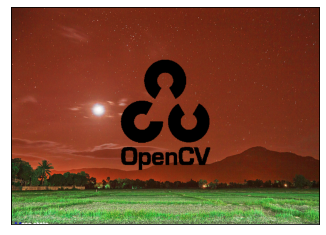

In [46]:
pltImage(img1_bg)

In [17]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

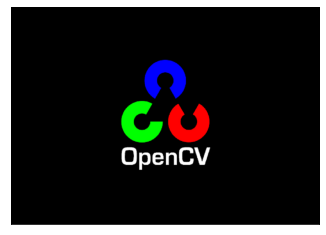

In [47]:
pltImage(img2_fg)

In [17]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)

In [17]:
img1[0:rows, 0:cols ] = dst

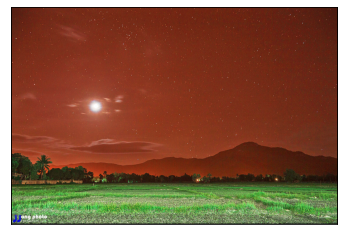

In [48]:
pltImage(img1)

In [49]:
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()